In [1]:
%run setup_env.py


In [2]:
from algorithms.nn.nn import Sequential
from algorithms.nn.layers import Dense
import numpy as np
from algorithms.nn.loss import mse, mse_derivative, binary_cross_entropy, binary_cross_entropy_derivative
from algorithms.utils import compute_loss, compute_accuracy

# Visualizing dataset

In [3]:
from sklearn.datasets import make_circles


# Make 1000 samples 
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [4]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [5]:
# increase dimension of y
y_req = y[:, None]
y_req[:5]

array([[1],
       [1],
       [1],
       [1],
       [0]])

In [6]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


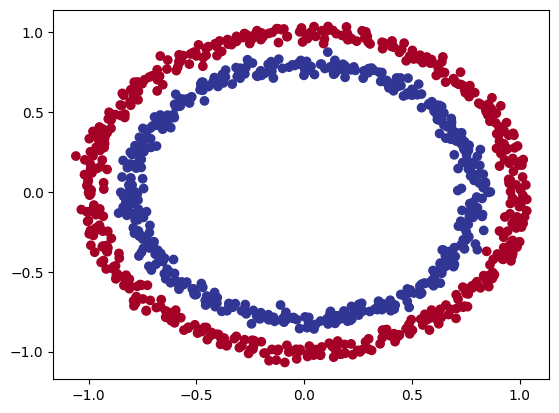

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

# Training the Model and Evaluating

In [9]:
def train_model(model, n_epochs, X, Y):
    lr_start = 0.0001
    lr_end = 0.00000001

    
    for epoch in range(n_epochs):
        # forward pass
        y_preds = model.forward(X)
        y_preds = np.clip(y_preds, 1e-4, 1 - 1e-4)
        y_val = np.round(y_preds[:, 0])
        # compute loss and accuracy
        loss = compute_loss(y_preds[:, 0], Y, binary_cross_entropy)
        accuracy = compute_accuracy(y_val, Y)
        print(f"Epoch {epoch}, loss: {loss} accuracy: {accuracy}")
    
        # backward pass
        gradient = binary_cross_entropy_derivative( Y[:, None], y_preds)
        lr = lr_start - epoch / n_epochs * (lr_start - lr_end)
        model1.backward(gradient,lr)

In [10]:
model1 = Sequential(layers=[
    Dense(input_size=2, output_size=1, activation="sigmoid"),
])
model1

Layer(2, 1, <function sigmoid at 0x7f50675d7700>)

In [11]:
train_model(model1, 1000, X_train, y_train)
    

Epoch 0, loss: 587.6300197846839 accuracy: 0.48875
Epoch 1, loss: 586.8896184040964 accuracy: 0.48875
Epoch 2, loss: 586.168530039901 accuracy: 0.4875
Epoch 3, loss: 585.4662086852613 accuracy: 0.4875
Epoch 4, loss: 584.7821233995393 accuracy: 0.4875
Epoch 5, loss: 584.1157579670296 accuracy: 0.48875
Epoch 6, loss: 583.4666105583276 accuracy: 0.48875
Epoch 7, loss: 582.8341933946458 accuracy: 0.49125
Epoch 8, loss: 582.2180324153751 accuracy: 0.4925
Epoch 9, loss: 581.6176669491581 accuracy: 0.49375
Epoch 10, loss: 581.0326493887261 accuracy: 0.495
Epoch 11, loss: 580.4625448697282 accuracy: 0.4975
Epoch 12, loss: 579.9069309537595 accuracy: 0.49875
Epoch 13, loss: 579.3653973157782 accuracy: 0.4975
Epoch 14, loss: 578.8375454360825 accuracy: 0.49625
Epoch 15, loss: 578.3229882969981 accuracy: 0.49625
Epoch 16, loss: 577.8213500844118 accuracy: 0.49625
Epoch 17, loss: 577.3322658942709 accuracy: 0.49625
Epoch 18, loss: 576.85538144415 accuracy: 0.49625
Epoch 19, loss: 576.3903527899729

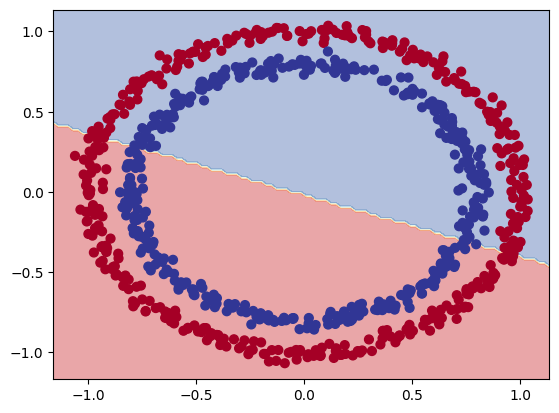

In [12]:
from algorithms.utils import plot_decision_boundary

plot_decision_boundary(model1, X_train, y_train)

## Introducing Non-Linearities
We say how the previous model is just as good as random guesser because straight lines can't enclose circular patterns. We need to introduce non-linearities to the model to make it work. 

| Model Improvement Technique        | Description                                                                                                                                               |
|------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------|
| Add more layers                    | Each layer potentially increases the learning capabilities of the model, with each layer able to learn new patterns in the data. More layers make the network deeper. |
| Add more hidden units              | More hidden units per layer mean a potential increase in the model's learning capabilities. More hidden units make the network wider.                       |
| Fitting for longer (more epochs)   | The model might learn more if it has more opportunities to look at the data.                                                                                |
| Changing the activation functions  | Non-linear activation functions can help fit data that can't be fit with only straight lines.                                                              |
| Change the learning rate           | The learning rate decides how much a model should change its parameters each step. Too high and the model overcorrects; too low and it doesn't learn enough. |
| Change the loss function           | Different problems require different loss functions. For example, binary cross-entropy won't work for multi-class classification.                           |
| Use transfer learning              | Take a pretrained model from a problem domain similar to yours and adjust it to your own problem.                                                           |


In [14]:
model2 = Sequential(layers=[
    Dense(input_size=2, output_size=4, activation="relu"),
    Dense(input_size=4, output_size=1, activation="sigmoid"),
])
model2

Layer(2, 4, <function relu at 0x7f50675d7790>) -> Layer(4, 1, <function sigmoid at 0x7f50675d7700>)